In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [5]:
pd.options.mode.copy_on_write = True


In [6]:
insurance = pd.read_csv("Insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


# Cleaning the data

In [7]:
#cleaning the null values
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [8]:
insurance_filled = insurance.dropna()
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB


In [9]:
insurance_filled['region'] = insurance_filled['region'].str.lower()
insurance_filled['region'].head(3)

0    southwest
1    southeast
2    southeast
Name: region, dtype: object

In [10]:
female = 'female'
male = 'male'
gen_map = {'woman': female,'F': female,'female':female,'man': male,'M':male,'male':male}
insurance_filled['sex']= insurance_filled['sex'].replace(gen_map)
insurance_filled['sex'].unique()


array(['female', 'male'], dtype=object)

In [11]:
insurance_filled["smoker"] = (insurance_filled['smoker']=="no")
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: bool(1), float64(3), object(3)
memory usage: 67.2+ KB


## making the charges section to bool value

In [12]:
insurance_filled['charges'] = insurance_filled['charges'].str.strip('$').astype("float64")

In [13]:
insurance_pos = insurance_filled.apply(lambda x:x.abs() if np.issubdtype(x.dtype,np.number) else x )

In [14]:
insurance_pos.sample(10)

,age,sex,bmi,children,smoker,region,charges
471,18.0,female,30.115,0.0,True,northeast,2203.47185
507,21.0,male,23.750,2.0,True,northwest,3077.09550
107,26.0,male,30.875,2.0,True,northwest,3877.30425
251,63.0,female,32.200,2.0,False,southwest,47305.30500
222,32.0,male,30.800,3.0,True,southwest,5253.52400
1248,18.0,female,39.820,0.0,True,southeast,1633.96180
719,58.0,female,33.440,0.0,True,northwest,12231.61360
147,51.0,female,37.730,1.0,True,southeast,9877.60770
726,41.0,male,28.405,1.0,True,northwest,6664.68595
1166,57.0,male,40.370,0.0,True,southeast,10982.50130


In [15]:
insurance_pos.to_csv("cleaned_insurance_data.csv", index = False)

# Task 2 - plots and graphs

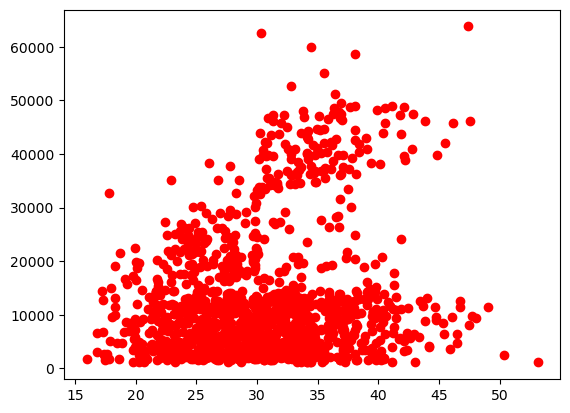

In [16]:
#scatter plot for relationships
import matplotlib.pyplot as plt
df= insurance_pos.copy()
plt.scatter(df['bmi'],df['charges'],color = 'red')

## Task 3 : prepare the data for the model fitting 

In [17]:
df_new = pd.get_dummies(df,prefix = ['region'],columns =['region'])
df_new = df_new.drop(columns=["region_southeast"])

df_new['region_northeast']= df_new['region_northeast'].astype('int64')
df_new['region_northwest']= df_new['region_northwest'].astype('int64')
df_new['region_southwest']= df_new['region_southwest'].astype('int64')
df_new['smoker'] = df_new['smoker'].astype("int64")
df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
df_new = df_new.drop(columns = 'sex')

df_new.head()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,0,16884.92400,0,0,1,0
1,18.0,33.770,1.0,1,1725.55230,0,0,0,1
2,28.0,33.000,3.0,1,4449.46200,0,0,0,1
3,33.0,22.705,0.0,1,21984.47061,0,1,0,1
4,32.0,28.880,0.0,1,3866.85520,0,1,0,1


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
df_new = df_new.dropna()

X = df_new.drop(columns = ['charges'])
y = df_new['charges']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
#mse
r2

0.7049323160872818

In [45]:
def pre_process(df):
    df_new = pd.get_dummies(df,prefix = ['region'],columns =['region'])
    df_new = df_new.drop(columns=["region_southeast"])
    df_new['smoker'] = (df_new['smoker']=='yes')
    #df_new['smoker'] = df_new['smoker'].astype("int64")
    df_new['smoker'] = (df_new['smoker'] == 'yes').astype(int)

    df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
    df_new = df_new.drop(columns = 'sex')

    return df_new

In [51]:
val_df = pd.read_csv('validation_dataset.csv')
validation_data = pre_process(val_df)
input_df = pre_process(val_df)
predicitions = model.predict(input_df)
validation_data = val_df.copy()
validation_data['predicited_charges'] = predicitions_new
validation_data.head()

,age,sex,bmi,children,smoker,region,predicited_charges
0,18.0,female,24.090000,1.0,no,southeast,24552.730446
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,30885.618880


In [43]:
#isinstance(val_df['smoker'],int) --False 
#smoker column is not integer datatype yet the code runs